# 1ere PARTIE

In [1]:
dataset = [
    ['Skirt', 'Sneakers', 'Scarf', 'Pants', 'Hat'],

    ['Sunglasses', 'Skirt', 'Sneakers', 'Pants', 'Hat'],

    ['Dress', 'Sandals', 'Scarf', 'Pants', 'Heels'],

    ['Dress', 'Necklace', 'Earrings', 'Scarf', 'Hat', 'Heels', 'Hat'],

    ['Earrings', 'Skirt', 'Skirt', 'Scarf', 'Shirt', 'Pants']
]

#### Afin d'utiliser la fonction apriori, nous devons transformer notre ensemble de données en un DataFrame encodé à chaud.
#### Transaction Encoder crée un tableau NumPy à partir d'une liste et "one-hot" et l'encode (mais dans un format True/False et non en 1 et 0).

In [2]:
import mlxtend
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_ary=te.fit(dataset).transform(dataset)    #Apply one-hot-encoding on our dataset
df=pd.DataFrame(te_ary, columns=te.columns_)  #Creating a new DataFrame from our Numpy array
df

,Dress,Earrings,Hat,Heels,Necklace,Pants,Sandals,Scarf,Shirt,Skirt,Sneakers,Sunglasses
0,False,False,True,False,False,True,False,True,False,True,True,False
1,False,False,True,False,False,True,False,False,False,True,True,True
2,True,False,False,True,False,True,True,True,False,False,False,False
3,True,True,True,True,True,False,False,True,False,False,False,False
4,False,True,False,False,False,True,False,True,True,True,False,False


# BONUS : un peu de visualisation

true : le produit a été acheté
false : le produit n'a pas été acheté


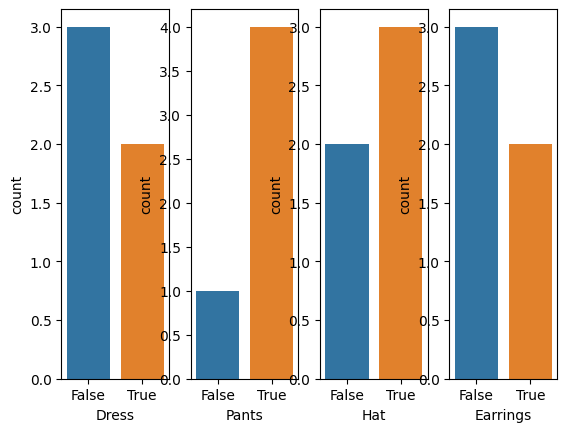

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
fig,ax =plt.subplots(1,4)
sns.countplot(data= df, x="Dress", ax=ax[0])
sns.countplot(data= df, x="Pants",ax=ax[1])
sns.countplot(data= df, x="Hat",ax=ax[2])
sns.countplot(data= df, x="Earrings",ax=ax[3])
#sns.countplot(data= df, x="Necklace",ax=ax[4])
#sns.countplot(data= df, x="Sandals",ax=ax[5])
#sns.countplot(data= df, x="Scarf",ax=ax[6])
#sns.countplot(data= df, x="Shirt",ax=ax[7])
print("true : le produit a été acheté")
print("false : le produit n'a pas été acheté")

#### Support :  le support quantifie la fréquence d'un ensemble d'éléments.
#### Confiance : Après avoir acheté l'article X, quelle est la probabilité d'acheter l'article Y ?
#### Lift : Quelle est la probabilité d'acheter les articles X et Y ensemble plutôt que d'acheter uniquement l'article X. si lift <=1 peu probable sinon prob

In [4]:
# Sélectionnons des ensembles d'éléments avec un support minimum de 60 %
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df, min_support=0.6,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.6,(Hat)
1,0.8,(Pants)
2,0.8,(Scarf)
3,0.6,(Skirt)
4,0.6,"(Pants, Scarf)"
5,0.6,"(Pants, Skirt)"


#### Nous remarquons que la frequence que Pantts et Scarf soient achetés est élevée (80%)

In [5]:
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="confidence",min_threshold=0.7) # associate itemsets with confidence over 70%.

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Pants),(Scarf),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
1,(Scarf),(Pants),0.8,0.8,0.6,0.75,0.9375,-0.04,0.8
2,(Pants),(Skirt),0.8,0.6,0.6,0.75,1.2500,0.12,1.6
3,(Skirt),(Pants),0.6,0.8,0.6,1.00,1.2500,0.12,inf


### pour mieux vendre skirt et pants nous pouvons les mettres cote à cote parce que nous avons remarqué la majeure partie des personnes qui achete skirt achete pants aussi

In [6]:
# Associating based on lift
from mlxtend.frequent_patterns import association_rules 
association_rules(frequent_itemsets,metric="lift",min_threshold=1.25)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Skirt),(Pants),0.6,0.8,0.6,1.0,1.25,0.12,inf


# FIN DE LA 1ere PARTIE